Import Libraries:

In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing, decomposition, splitting, and metrics
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, auc, precision_recall_curve,
                             average_precision_score)

# TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# IPython for DataFrame display
from IPython.display import display

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


Data Loading:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define file paths
train_path = "/content/drive/My Drive/ECG_Dataset/mitbih_train.csv"

# Load CSV files
df_train = pd.read_csv(train_path, header=None)

# Display first few rows of dataset
print("First few rows of the training dataset:")
display(df_train.head())


Mounted at /content/drive
First few rows of the training dataset:


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Categorization of Data:

In [ ]:
# --- Missing Values ---
# missing values in data
missing_train = pd.DataFrame(df_train.isnull().sum(), columns=["Missing Values"])

print("Missing values in training data:")
display(missing_train)


Missing values in training data:


,Missing Values
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [ ]:


# --- Data Types ---
dtypes_train = pd.DataFrame(df_train.dtypes, columns=["Data Type"])
print("\nTraining data types:")
display(dtypes_train)




Training data types:


,Data Type
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
183,float64
184,float64
185,float64
186,float64


In [ ]:

# --- Descriptive Statistics ---
desc_train = df_train.describe().T
print("\nDescriptive Statistics of Training Data:")
display(desc_train)


Descriptive Statistics of Training Data:


,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


Visualize Class Distribution:

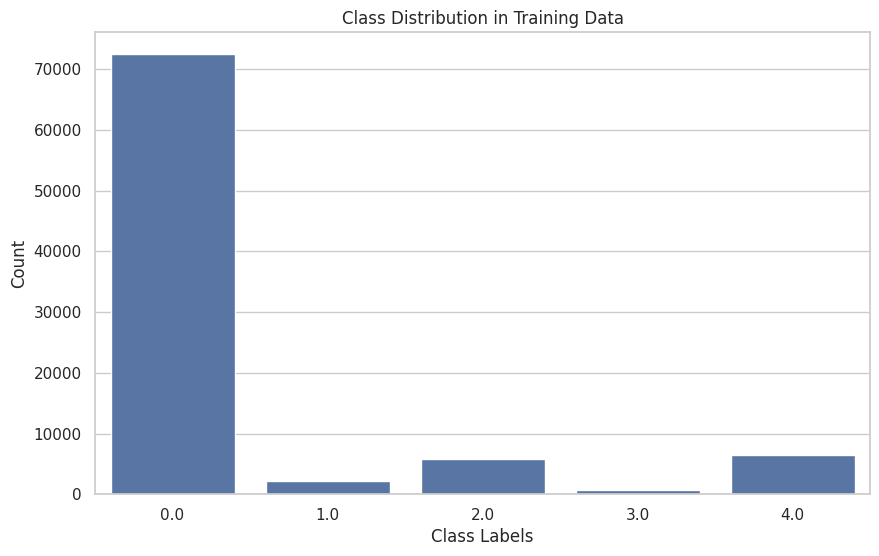

In [ ]:
# Class distribution
plt.figure()
sns.countplot(x=df_train.iloc[:, -1])
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

Compute and Visualize the Correlation Matrix:

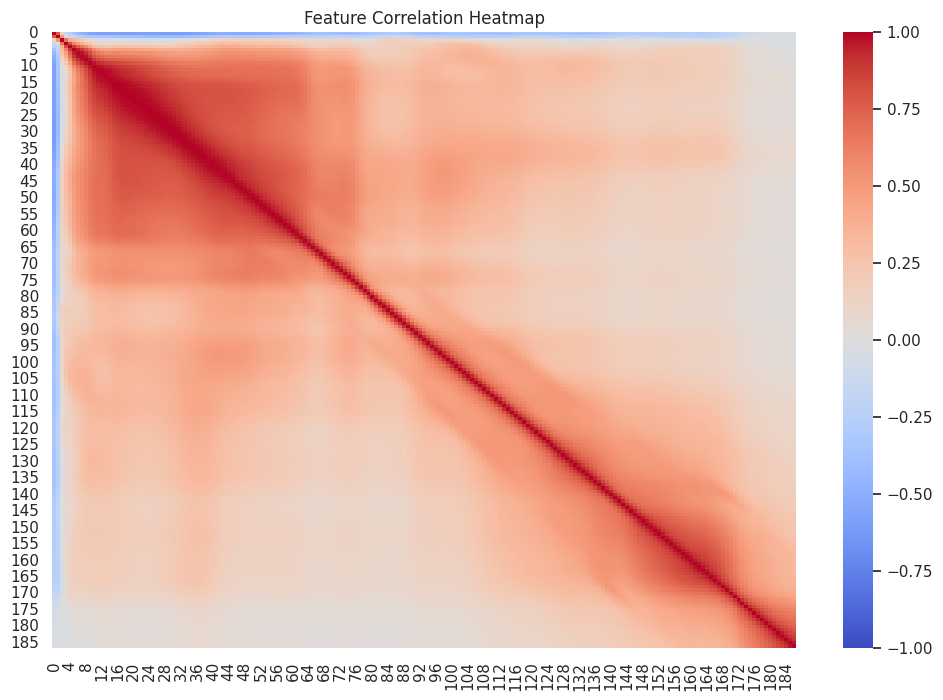

In [ ]:
# Correlation matrix
correlation_matrix = df_train.iloc[:, :-1].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Additional Visualizations for Feature Distributions:

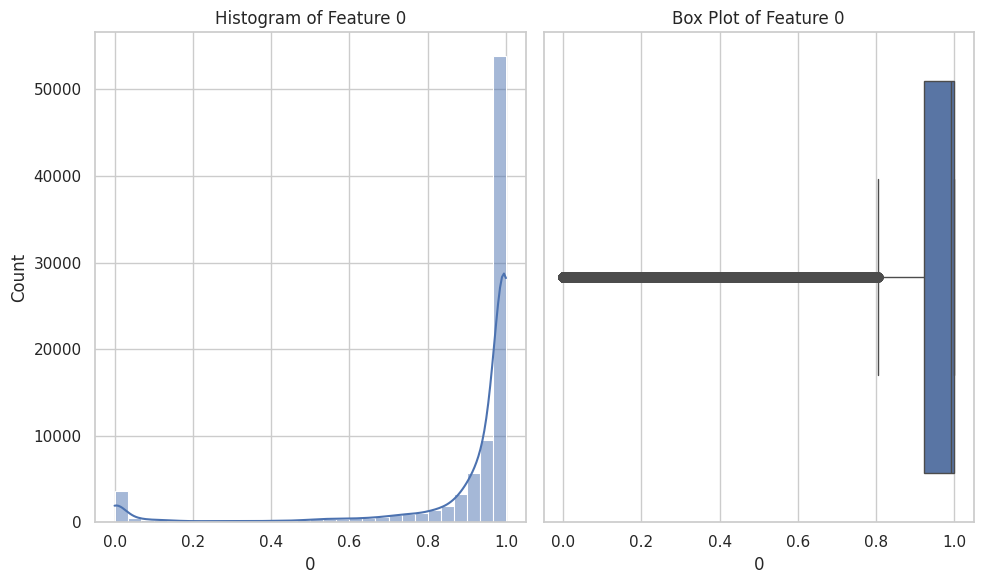

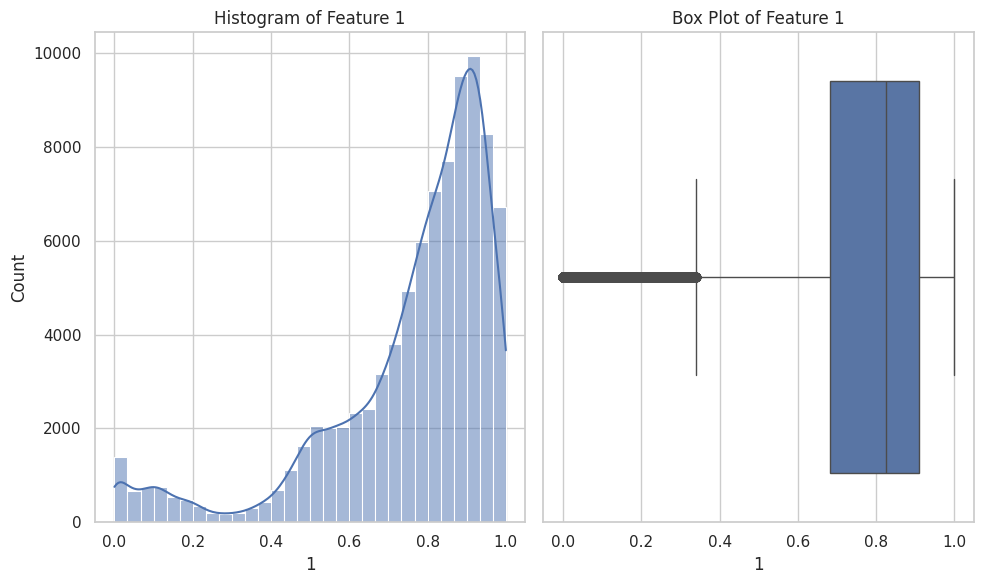

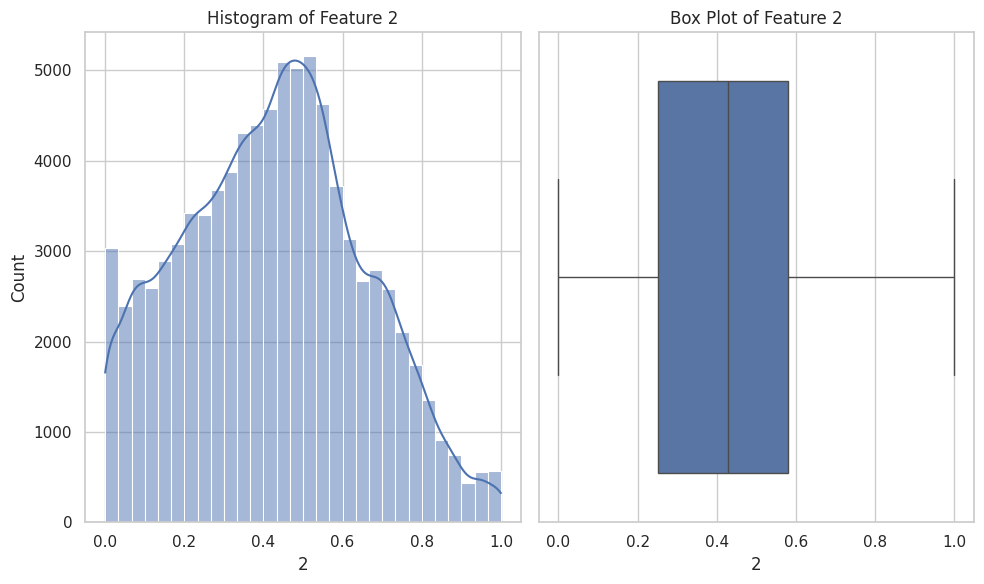

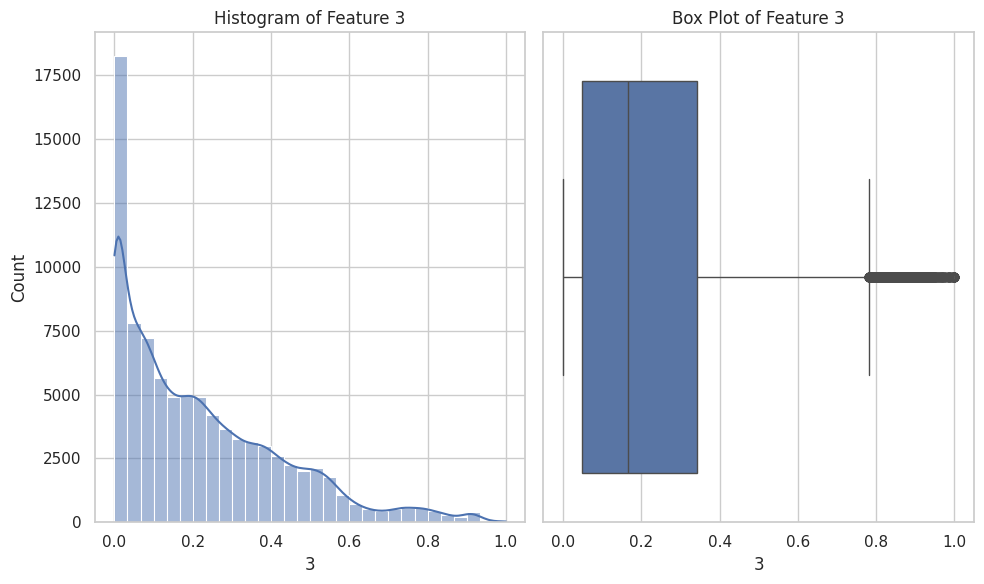

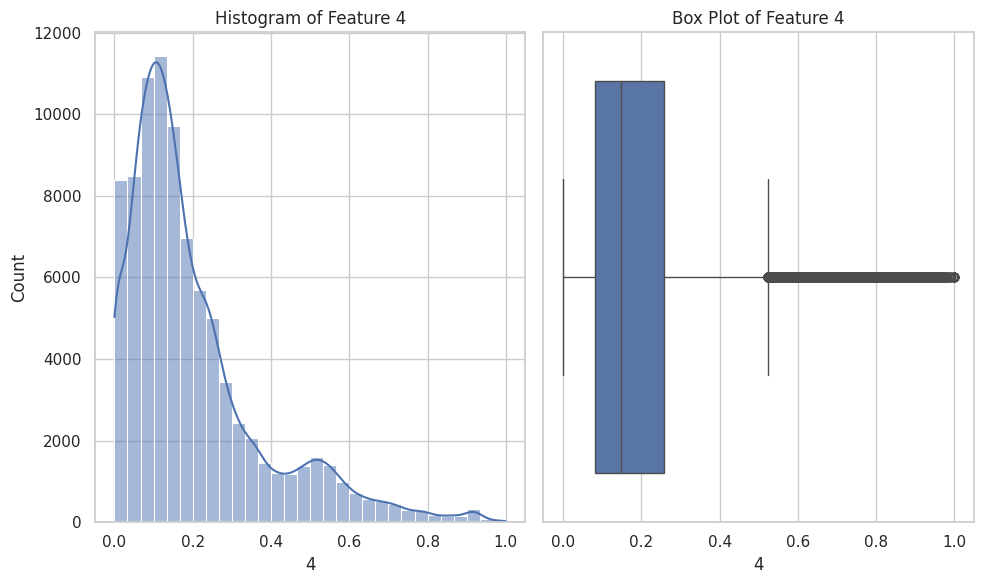

In [ ]:

selected_features = [0, 1, 2, 3, 4]
for feature in selected_features:
    plt.figure()
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f"Histogram of Feature {feature}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[feature])
    plt.title(f"Box Plot of Feature {feature}")

    plt.tight_layout()
    plt.show()


Data Cleaning

In [ ]:
# Remove duplicate rows
initial_rows = df_train.shape[0]
df_train = df_train.drop_duplicates()
final_rows = df_train.shape[0]
print(f"Removed {initial_rows - final_rows} duplicate rows from training data.")


def remove_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_train = remove_outliers(df_train, 0)
print(f"Training data shape after outlier removal: {df_train.shape}")


Removed 0 duplicate rows from training data.
Training data shape after outlier removal: (75393, 188)


Data Scaling(Normalization)

In [ ]:
# Separate features and target from raw DataFrames
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train_scaled['target'] = y_train.values

print("First few rows of the normalized training data:")
display(df_train_scaled.head())


First few rows of the normalized training data:


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Feature Engineering

In [ ]:

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)

df_train_pca = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
df_train_pca['target'] = y_train.values

print("Shape of PCA-transformed training data:", df_train_pca.shape)


Shape of PCA-transformed training data: (87554, 51)


In [ ]:
# Use normalized data for modeling
X_train_full = df_train_scaled.drop('target', axis=1)
y_train_full = df_train_scaled['target']

# Split into training (80%) and validation (20%) sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print("Training set shape:", X_train_split.shape)
print("Validation set shape:", X_val_split.shape)


Training set shape: (70043, 187)
Validation set shape: (17511, 187)


Logistic Regression with GridSearchCV

In [ ]:

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l2']
}

lr = LogisticRegression(max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_split, y_train_split)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
y_val_pred_lr = grid_lr.predict(X_val_split)
accuracy_lr = accuracy_score(y_val_split, y_val_pred_lr)
print("Validation Accuracy for Logistic Regression:", accuracy_lr)


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Validation Accuracy for Logistic Regression: 0.9530472843026726


Random Forest

In [ ]:

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)


rf_model.fit(X_train_split, y_train_split)

# Predict on validation data
y_pred_rf = rf_model.predict(X_val_split)

print("Random Forest Performance:")
print(classification_report(y_val_split, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     13122
         1.0       0.98      0.63      0.77       390
         2.0       0.98      0.84      0.90       596
         3.0       0.81      0.62      0.70       112
         4.0       1.00      0.94      0.97       859

    accuracy                           0.98     15079
   macro avg       0.95      0.80      0.86     15079
weighted avg       0.98      0.98      0.97     15079



Data prepration for LSTM

In [ ]:



n_timesteps = X_train_full.shape[1]

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_split.values.reshape(-1, n_timesteps, 1)
X_val_lstm = X_val_split.values.reshape(-1, n_timesteps, 1)

num_classes = len(np.unique(y_train_full))
y_train_cat = to_categorical(y_train_split, num_classes)
y_val_cat = to_categorical(y_val_split, num_classes)


LSTM with Early Stopping

In [ ]:

# Building LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(n_timesteps, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")  # num_classes output classes
])

# Compiling model
lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set up EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the LSTM model
history = lstm_model.fit(
    X_train_lstm,
    y_train_cat,
    validation_data=(X_val_lstm, y_val_cat),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 409s 214ms/step - accuracy: 0.8662 - loss: 0.5926 - val_accuracy: 0.8702 - val_loss: 0.5233
Epoch 2/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 457s 222ms/step - accuracy: 0.8731 - loss: 0.5082 - val_accuracy: 0.9118 - val_loss: 0.3491
Epoch 3/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 417s 221ms/step - accuracy: 0.9116 - loss: 0.3514 - val_accuracy: 0.9157 - val_loss: 0.3272
Epoch 4/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 442s 222ms/step - accuracy: 0.9158 - loss: 0.3330 - val_accuracy: 0.9166 - val_loss: 0.3230
Epoch 5/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 444s 222ms/step - accuracy: 0.9168 - loss: 0.3235 - val_accuracy: 0.9201 - val_loss: 0.3204
Epoch 6/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 443s 223ms/step - accuracy: 0.9238 - loss: 0.3121 - val_accuracy: 0.9255 - val_loss: 0.2999
Epoch 7/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 445s 225ms/step - accuracy: 0.9255 - loss: 0.3114 - val_accuracy: 0.9257 - val_loss: 0.3103
Epoch 8/20
1885/1885 ━━━━━━━━━━━━━━━━━━━━ 439s 223ms/step - ac

LSTM history

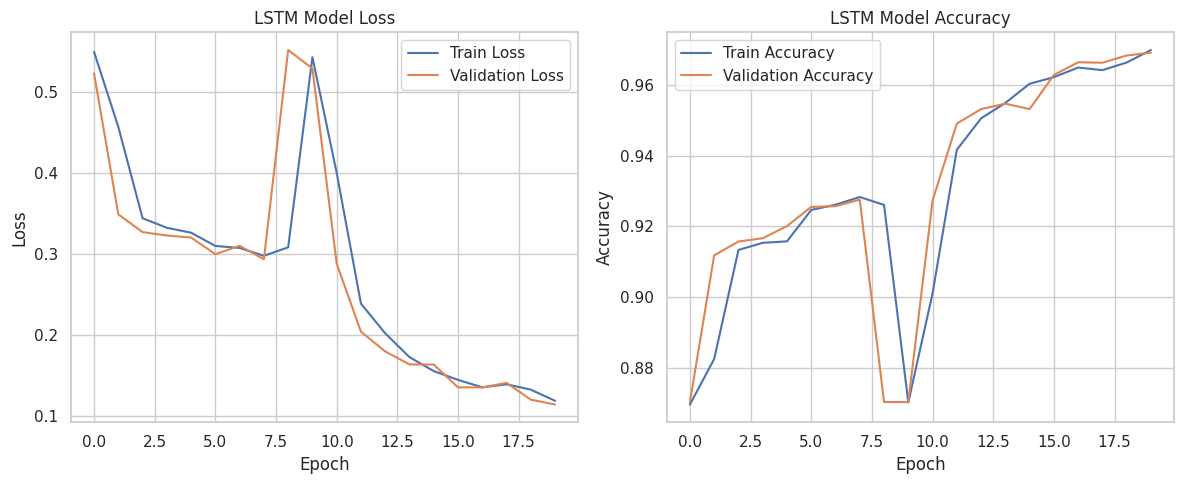

Final Accuracy Summary:


,Phase,Accuracy (%)
0,Training Accuracy,96.997380
1,Validation Accuracy,96.922874


Final Loss Summary:


,Phase,Loss Value,Loss (%)
0,Training Loss,0.118750,11.875039
1,Validation Loss,0.114145,11.414526


In [ ]:


plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Extract final training and validation accuracy and loss values
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100

final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

final_train_loss_pct = final_train_loss * 100
final_val_loss_pct = final_val_loss * 100

# Create a summary DataFrame for Accuracy
accuracy_summary = pd.DataFrame({
    'Phase': ['Training Accuracy', 'Validation Accuracy'],
    'Accuracy (%)': [final_train_accuracy, final_val_accuracy]
})

print("Final Accuracy Summary:")
display(accuracy_summary)

# Create a summary DataFrame for Loss
loss_summary = pd.DataFrame({
    'Phase': ['Training Loss', 'Validation Loss'],
    'Loss Value': [final_train_loss, final_val_loss],
    'Loss (%)': [final_train_loss_pct, final_val_loss_pct]
})

print("Final Loss Summary:")
display(loss_summary)



Defining Top-k Accuracy Function

In [ ]:
def top_k_accuracy(y_true, y_prob, k=5):
    top_k_preds = np.argsort(y_prob, axis=1)[:, -k:]
    return np.mean([1 if y_true.values[i] in top_k_preds[i] else 0 for i in range(len(y_true))])


LR

In [ ]:
# --- Logistic Regression Metrics Evaluation and Display as DataFrames ---

# Predictions and predicted probabilities
y_val_pred_lr = grid_lr.predict(X_val_split)
y_val_prob_lr = grid_lr.predict_proba(X_val_split)

# Compute the classification report
lr_report = classification_report(y_val_split, y_val_pred_lr, output_dict=True)
lr_report_df = pd.DataFrame(lr_report).transpose()
print("Logistic Regression Classification Report:")
display(lr_report_df)

# Compute overall accuracy
accuracy_lr = accuracy_score(y_val_split, y_val_pred_lr)

classes = np.unique(y_val_split)
y_val_onehot = label_binarize(y_val_split, classes=classes)

# Compute ROC AUC Score (macro average, one-vs-rest)
roc_auc_lr = roc_auc_score(y_val_onehot, y_val_prob_lr, average="macro", multi_class="ovr")

# Compute AUPR for each class and then macro average
aupr_scores_lr = []
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_val_onehot[:, i], y_val_prob_lr[:, i])

    sorted_indices = np.argsort(recall)
    recall_sorted = recall[sorted_indices]
    precision_sorted = precision[sorted_indices]
    aupr = auc(recall_sorted, precision_sorted)
    aupr_scores_lr.append(aupr)
macro_aupr_lr = np.mean(aupr_scores_lr)

# Compute Top-5 Accuracy (mAP)
top5_map_lr = top_k_accuracy(y_val_split, y_val_prob_lr, k=5)

summary_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC (macro, OVR)', 'Macro AUPR', 'Top-5 mAP'],
    'Value': [accuracy_lr, roc_auc_lr, macro_aupr_lr, top5_map_lr]
})
print("Overall Logistic Regression Performance Metrics:")
display(summary_lr)


aupr_scores_lr_df = pd.DataFrame({
    'Class': classes,
    'AUPR': aupr_scores_lr
})
print("AUPR Scores for Each Class:")
display(aupr_scores_lr_df)


Logistic Regression Classification Report:


,precision,recall,f1-score,support
0.0,0.958226,0.992913,0.975261,13122.000000
1.0,0.882845,0.541026,0.670906,390.000000
2.0,0.858491,0.610738,0.713725,596.000000
3.0,0.459016,0.250000,0.323699,112.000000
4.0,0.974934,0.860303,0.914038,859.000000
accuracy,0.953047,0.953047,0.953047,0.953047
macro avg,0.826702,0.650996,0.719526,15079.000000
weighted avg,0.949578,0.953047,0.948725,15079.000000


Overall Logistic Regression Performance Metrics:


,Metric,Value
0,Accuracy,0.953047
1,"ROC AUC (macro, OVR)",0.945421
2,Macro AUPR,0.743697
3,Top-5 mAP,1.000000


AUPR Scores for Each Class:


,Class,AUPR
0,0.0,0.983444
1,1.0,0.621228
2,2.0,0.786060
3,3.0,0.392902
4,4.0,0.934850


RF

In [ ]:
# --- Random Forest Metrics Evaluation and Display as DataFrames ---

# Predictions and predicted probabilities for Random Forest
y_val_pred_rf = rf_model.predict(X_val_split)
y_val_prob_rf = rf_model.predict_proba(X_val_split)

# Generate classification report as a dictionary
rf_report = classification_report(y_val_split, y_val_pred_rf, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print("\nRandom Forest Classification Report:")
display(rf_report_df)

# Compute overall accuracy
accuracy_rf = accuracy_score(y_val_split, y_val_pred_rf)

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_val_onehot, y_val_prob_rf, average="macro", multi_class="ovr")

# Compute AUPR for each class with sorted recall for proper AUC calculation
aupr_scores_rf = []
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_val_onehot[:, i], y_val_prob_rf[:, i])
    sorted_indices = np.argsort(recall)
    recall_sorted = recall[sorted_indices]
    precision_sorted = precision[sorted_indices]
    aupr = auc(recall_sorted, precision_sorted)
    aupr_scores_rf.append(aupr)
macro_aupr_rf = np.mean(aupr_scores_rf)

# Compute Top-5 mAP (top-5 accuracy)
top5_map_rf = top_k_accuracy(y_val_split, y_val_prob_rf, k=5)

# Create a summary DataFrame for overall metrics
summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC (macro, OVR)', 'Macro AUPR', 'Top-5 mAP'],
    'Value': [accuracy_rf, roc_auc_rf, macro_aupr_rf, top5_map_rf]
})
print("Overall Random Forest Performance Metrics:")
display(summary_rf)

# Create a DataFrame for AUPR scores per class
aupr_scores_rf_df = pd.DataFrame({
    'Class': classes,
    'AUPR': aupr_scores_rf
})
print("Random Forest AUPR Scores for Each Class:")
display(aupr_scores_rf_df)



Random Forest Classification Report:


,precision,recall,f1-score,support
0.0,0.976162,0.998628,0.987267,13122.000000
1.0,0.976285,0.633333,0.768274,390.000000
2.0,0.978389,0.835570,0.901357,596.000000
3.0,0.811765,0.616071,0.700508,112.000000
4.0,0.996287,0.937136,0.965807,859.000000
accuracy,0.976391,0.976391,0.976391,0.976391
macro avg,0.947778,0.804148,0.864643,15079.000000
weighted avg,0.976179,0.976391,0.974855,15079.000000


Overall Random Forest Performance Metrics:


,Metric,Value
0,Accuracy,0.976391
1,"ROC AUC (macro, OVR)",0.993818
2,Macro AUPR,0.932766
3,Top-5 mAP,1.000000


Random Forest AUPR Scores for Each Class:


,Class,AUPR
0,0.0,0.999095
1,1.0,0.897132
2,2.0,0.976879
3,3.0,0.795239
4,4.0,0.995485


LSTM

In [ ]:
# --- LSTM Model Metrics Evaluation and Display as DataFrames ---

# Get predictions and predicted probabilities for LSTM
y_val_pred_lstm_prob = lstm_model.predict(X_val_lstm)
y_val_pred_lstm = np.argmax(y_val_pred_lstm_prob, axis=1)

# Generate classification report and convert it to a DataFrame
print("\nLSTM Model Classification Report:")
lstm_report = classification_report(y_val_split, y_val_pred_lstm, output_dict=True)
lstm_report_df = pd.DataFrame(lstm_report).transpose()
display(lstm_report_df)

# Calculate overall accuracy
accuracy_lstm = accuracy_score(y_val_split, y_val_pred_lstm)
print("LSTM Model Accuracy:", accuracy_lstm)

# Compute ROC AUC Score
roc_auc_lstm = roc_auc_score(y_val_onehot, y_val_pred_lstm_prob, average="macro", multi_class="ovr")
print("LSTM Model ROC AUC (macro, OVR):", roc_auc_lstm)

# Compute AUPR for each class
aupr_scores_lstm = []
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_val_onehot[:, i], y_val_pred_lstm_prob[:, i])
    sorted_indices = np.argsort(recall)
    recall_sorted = recall[sorted_indices]
    precision_sorted = precision[sorted_indices]
    aupr = auc(recall_sorted, precision_sorted)
    aupr_scores_lstm.append(aupr)

macro_aupr_lstm = np.mean(aupr_scores_lstm)
print("LSTM Model Macro AUPR:", macro_aupr_lstm)

# Compute Top-5 Accuracy (mAP)
top5_map_lstm = top_k_accuracy(y_val_split, y_val_pred_lstm_prob, k=5)
print("LSTM Model Top-5 mAP:", top5_map_lstm)

#summary DataFrame for overall LSTM metrics
summary_lstm = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC (macro, OVR)', 'Macro AUPR', 'Top-5 mAP'],
    'Value': [accuracy_lstm, roc_auc_lstm, macro_aupr_lstm, top5_map_lstm]
})
print("Overall LSTM Performance Metrics:")
display(summary_lstm)

#AUPR scores for each class
aupr_scores_lstm_df = pd.DataFrame({
    'Class': classes,
    'AUPR': aupr_scores_lstm
})
print("LSTM AUPR Scores for Each Class:")
display(aupr_scores_lstm_df)


472/472 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step

LSTM Model Classification Report:


,precision,recall,f1-score,support
0.0,0.979641,0.990093,0.984839,13122.000000
1.0,0.771341,0.648718,0.704735,390.000000
2.0,0.899461,0.840604,0.869037,596.000000
3.0,0.617188,0.705357,0.658333,112.000000
4.0,0.982587,0.919674,0.950090,859.000000
accuracy,0.969229,0.969229,0.969229,0.969229
macro avg,0.850044,0.820889,0.833407,15079.000000
weighted avg,0.968560,0.969229,0.968613,15079.000000


LSTM Model Accuracy: 0.9692287286955369
LSTM Model ROC AUC (macro, OVR): 0.9766423819858623
LSTM Model Macro AUPR: 0.8666640873982402
LSTM Model Top-5 mAP: 1.0
Overall LSTM Performance Metrics:


,Metric,Value
0,Accuracy,0.969229
1,"ROC AUC (macro, OVR)",0.976642
2,Macro AUPR,0.866664
3,Top-5 mAP,1.000000


LSTM AUPR Scores for Each Class:


,Class,AUPR
0,0.0,0.995887
1,1.0,0.728098
2,2.0,0.944513
3,3.0,0.691998
4,4.0,0.972825


ROC curves

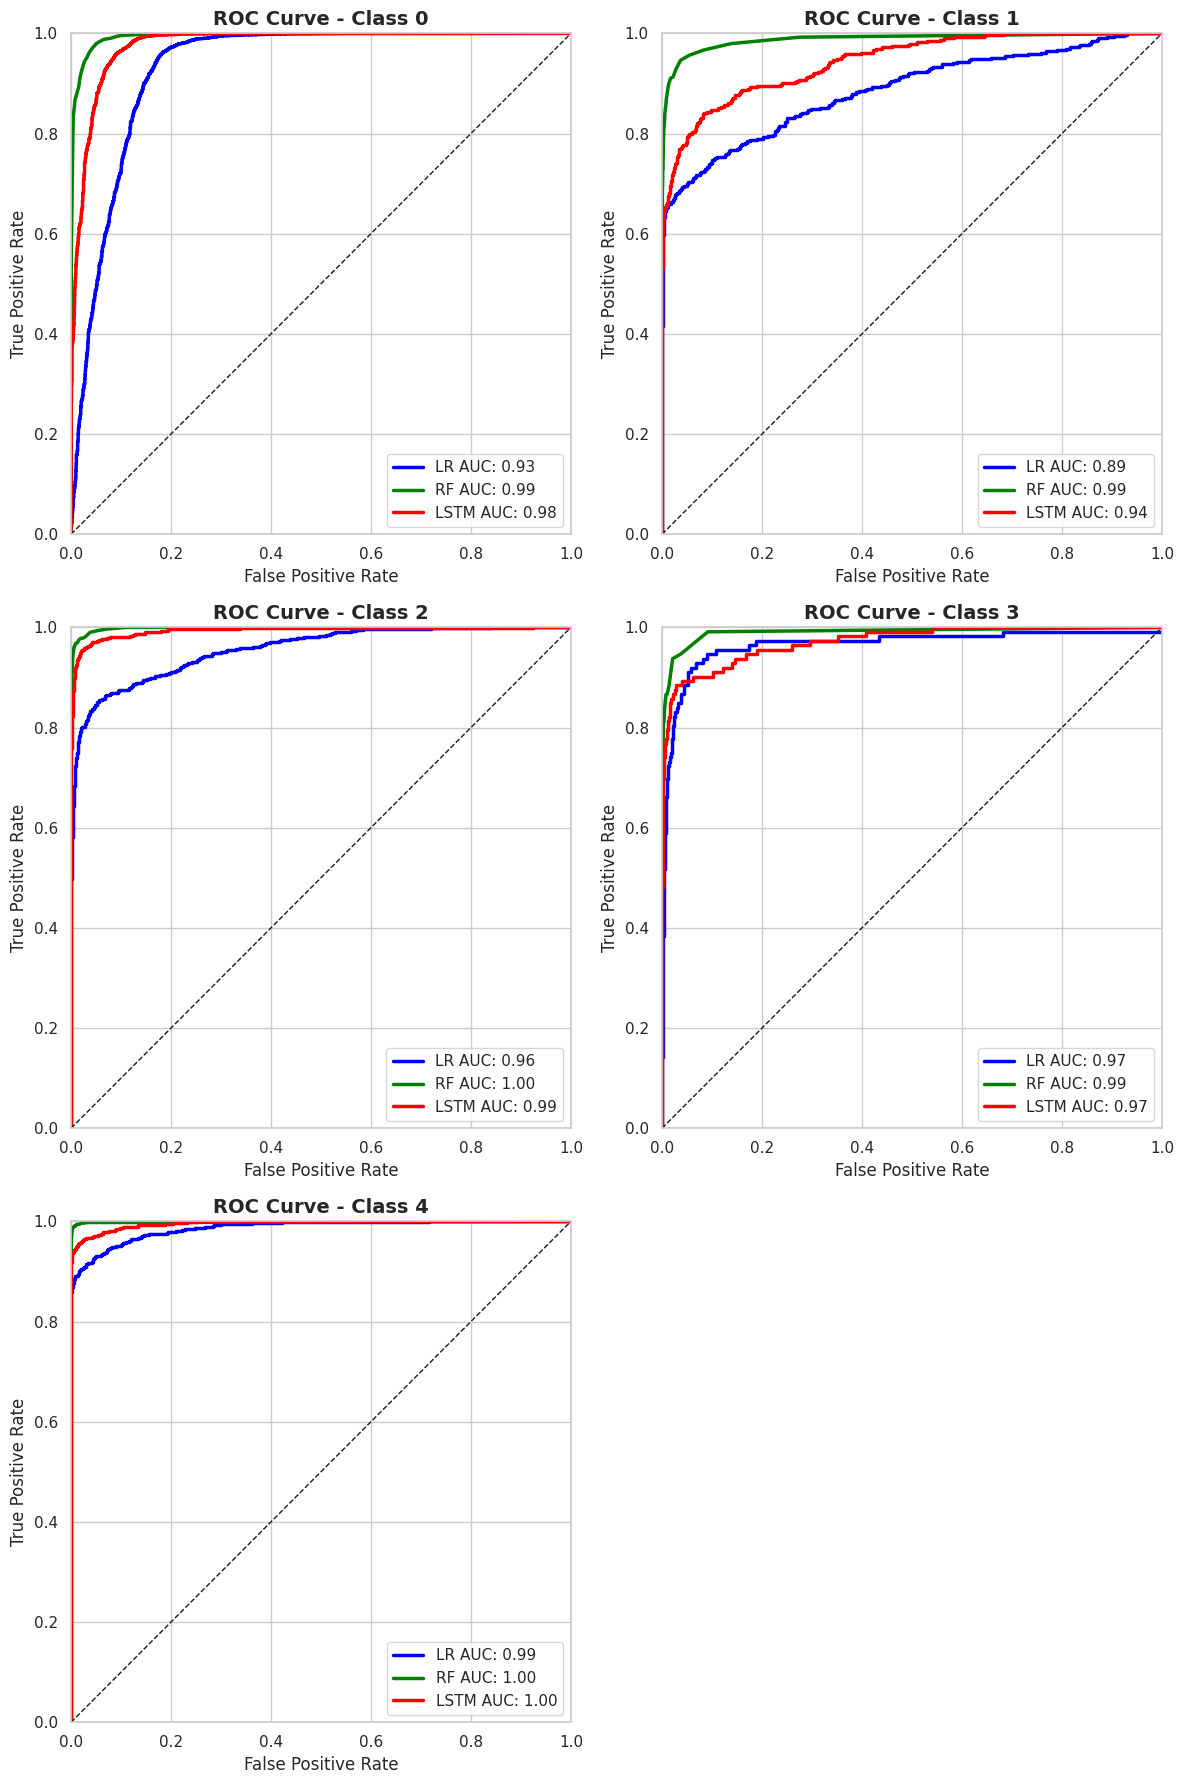

In [ ]:

sns.set_style("whitegrid")

rows = (n_classes + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()

for i in range(n_classes):
    fpr_lr, tpr_lr, _ = roc_curve(y_val_onehot[:, i], y_val_prob_lr[:, i])
    fpr_rf, tpr_rf, _ = roc_curve(y_val_onehot[:, i], y_val_prob_rf[:, i])
    fpr_lstm, tpr_lstm, _ = roc_curve(y_val_onehot[:, i], y_val_pred_lstm_prob[:, i])

    ax = axes[i]
    ax.plot(fpr_lr, tpr_lr, label=f'LR AUC: {auc(fpr_lr, tpr_lr):.2f}', color='blue', linewidth=2.5)
    ax.plot(fpr_rf, tpr_rf, label=f'RF AUC: {auc(fpr_rf, tpr_rf):.2f}', color='green', linewidth=2.5)
    ax.plot(fpr_lstm, tpr_lstm, label=f'LSTM AUC: {auc(fpr_lstm, tpr_lstm):.2f}', color='red', linewidth=2.5)
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Diagonal reference line

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_title(f'ROC Curve - Class {i}', fontsize=14, fontweight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.legend(loc='lower right', fontsize=11)

for j in range(n_classes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
